In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

src_train_dir = '../data/train' 
src_test_dir = '../data/test'
src_main_dir = '../all_dataset.csv'

# Exploring Train files
tr_path, tr_dirs, tr_files = next(os.walk(src_train_dir))
print("Train Directory # of files: ", len(tr_files))

# Exploring Test files
tst_path, tst_dirs, tst_files = next(os.walk(src_test_dir))
print("Test Directory # of files: ", len(tst_files))

# Exploring csv file
df_alldata = pd.read_csv(src_main_dir)
print("csv file # of samples: ", len(df_alldata))
print('\n**********\n')
print('CSV file content:\n', df_alldata.head(2))

Train Directory # of files:  2790
Test Directory # of files:  700
csv file # of samples:  5006

**********

CSV file content:
            dish_id  total_calories  total_mass  total_fat  total_carb  \
0  dish_1561662216      300.794281       193.0  12.387489    28.21829   
1  dish_1562688426      137.569992        88.0   8.256000     5.19000   

   unnamed1         unnamed2          unnamed3   unnamed4   unnamed5  ...  \
0  18.63397  ingr_0000000508         soy sauce   3.398568   1.801241  ...   
1  10.29700  ingr_0000000433  roasted potatoes  17.000000  23.970000  ...   

   unnamed265  unnamed266  unnamed267 unnamed268 unnamed269  unnamed270  \
0         NaN         NaN         NaN        NaN        NaN         NaN   
1         NaN         NaN         NaN        NaN        NaN         NaN   

   unnamed271  unnamed272  unnamed273  unnamed274  
0         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN  

[2 rows x 279 columns]


In [2]:
import numpy as np
import pandas as pd

df_alldata = pd.read_csv(src_main_dir)
df_alldata = df_alldata.iloc[:, 0:6]
df_alldata.iloc[:, 1:5] = np.asarray(df_alldata.iloc[:, 1:5]).astype(np.float32)

# Normalizing outputs in range [0-1]
calories_max = df_alldata.iloc[:, 1].max()
mass_max = df_alldata.iloc[:, 2].max()
fat_max = df_alldata.iloc[:, 3].max()
carb_max = df_alldata.iloc[:, 4].max()
protein_max = df_alldata.iloc[:, 5].max()

df_alldata.iloc[:, 1] = df_alldata.iloc[:, 1] / calories_max
df_alldata.iloc[:, 2] = df_alldata.iloc[:, 2] / mass_max
df_alldata.iloc[:, 3] = df_alldata.iloc[:, 3] / fat_max
df_alldata.iloc[:, 4] = df_alldata.iloc[:, 4] / carb_max
df_alldata.iloc[:, 5] = df_alldata.iloc[:, 5] / protein_max

outputs_max_values = {'max_calorie': [calories_max], 'max_mass': [mass_max], 
                      'max_fat': [fat_max], 'max_carb': [carb_max], 'max_protein': [protein_max]} 
df_outputs_max_values = pd.DataFrame(outputs_max_values)
df_outputs_max_values.to_csv("./outputs_max_values.csv", index=False)
print("Outputs MAX values: \n", df_outputs_max_values)

Outputs MAX values: 
    max_calorie  max_mass     max_fat    max_carb  max_protein
0   9485.81543    7975.0  875.541016  844.568604   147.491821


In [3]:
# adding full image name column...
df_alldata['dishimage'] = df_alldata["dish_id"] + ".png"
print("df_alldata: ")
df_alldata.head(3)

df_alldata: 


,dish_id,total_calories,total_mass,total_fat,total_carb,unnamed1,dishimage
0,dish_1561662216,0.031710,0.024201,0.014148,0.033411,0.126339,dish_1561662216.png
1,dish_1562688426,0.014503,0.011034,0.009430,0.006145,0.069814,dish_1562688426.png
2,dish_1561662054,0.044217,0.036614,0.027227,0.031201,0.175675,dish_1561662054.png


In [4]:
import os
import shutil
import random
import glob

# setting base directory for train-valid splitting
base_dir = './nutrition-data/'

# creating three folders' paths (train, valid and test)
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# remove base directory if exists
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
    
os.mkdir(base_dir)

# Organize data into train, valid, test dirs
shutil.copytree(src_train_dir, train_dir)
shutil.copytree(src_test_dir, test_dir)

valid_num_samples = 400
os.mkdir(valid_dir)

# move random samples from test data to be used as validation data 
for img in random.sample(glob.glob(test_dir + "/*"), valid_num_samples):
    shutil.move(img, valid_dir)

print("# of train samples: ", len(os.listdir(train_dir)))
print("# of valid samples: ", len(os.listdir(valid_dir)))
print("# of test  samples: ", len(os.listdir(test_dir)))

# of train samples:  2790
# of valid samples:  400
# of test  samples:  300


In [5]:
import pandas as pd
import os
import warnings
import shutil
import random
import glob

warnings.filterwarnings("ignore")

src_train_dir = '../data/train' 
src_test_dir = '../data/test'
src_main_dir = '../data/header_filled_combine.csv'

# Exploring Train files
tr_path, tr_dirs, tr_files = next(os.walk(src_train_dir))
print("Train Directory # of files: ", len(tr_files))

# Exploring Test files
tst_path, tst_dirs, tst_files = next(os.walk(src_test_dir))
print("Test Directory # of files: ", len(tst_files))

# Exploring CSV file
df_alldata = pd.read_csv(src_main_dir)
print("CSV file # of samples: ", len(df_alldata))
print('\n**********\n')
print('CSV file content:\n', df_alldata.head(2))

import numpy as np

# Preprocessing CSV data
df_alldata = pd.read_csv(src_main_dir)
df_alldata = df_alldata.iloc[:, 0:6]
df_alldata.iloc[:, 1:5] = np.asarray(df_alldata.iloc[:, 1:5]).astype(np.float32)

# Normalizing outputs in range [0-1]
outputs_max_values = {}
for i in range(1, 6):
    max_value = df_alldata.iloc[:, i].max()
    df_alldata.iloc[:, i] = df_alldata.iloc[:, i] / max_value
    outputs_max_values[df_alldata.columns[i]] = [max_value]

df_outputs_max_values = pd.DataFrame(outputs_max_values)
df_outputs_max_values.to_csv("./outputs_max_values.csv", index=False)
print("Outputs MAX values: \n", df_outputs_max_values)

# Adding full image name column
df_alldata['dishimage'] = df_alldata["dish_id"] + ".png"
print("df_alldata: ")
print(df_alldata.head(3))

# Setting base directory for train-valid splitting
base_dir = './nutrition-data/'

# Creating train, valid, test directories
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Remove base directory if exists
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
    
os.mkdir(base_dir)

# Organize data into train, valid, test dirs
shutil.copytree(src_train_dir, train_dir)
shutil.copytree(src_test_dir, test_dir)

valid_num_samples = 400
os.mkdir(valid_dir)

# Move random samples from test data to be used as validation data 
for img in random.sample(glob.glob(test_dir + "/*"), valid_num_samples):
    shutil.move(img, valid_dir)

print("# of train samples: ", len(os.listdir(train_dir)))
print("# of valid samples: ", len(os.listdir(valid_dir)))
print("# of test  samples: ", len(os.listdir(test_dir)))

# Creating train, valid, test dataframes and separate csv files
df_train = pd.DataFrame(columns=df_alldata.columns)
df_valid = pd.DataFrame(columns=df_alldata.columns)
df_test = pd.DataFrame(columns=df_alldata.columns)

df_alldata = df_alldata.sample(frac=1)  # Shuffles all data

train_files = os.listdir(train_dir)
valid_files = os.listdir(valid_dir)
test_files = os.listdir(test_dir)

for idx in df_alldata.index:
    if df_alldata.iloc[idx]['dishimage'] in train_files:
        df_train = pd.concat([df_train, df_alldata.iloc[[idx]]])
    if df_alldata.iloc[idx]['dishimage'] in valid_files:
        df_valid = pd.concat([df_valid, df_alldata.iloc[[idx]]])
    if df_alldata.iloc[idx]['dishimage'] in test_files:
        df_test = pd.concat([df_test, df_alldata.iloc[[idx]]])

df_train.to_csv(os.path.join(base_dir, 'train_data.csv'), index=False)
df_valid.to_csv(os.path.join(base_dir, 'valid_data.csv'), index=False)
df_test.to_csv(os.path.join(base_dir, 'test_data.csv'), index=False)



Train Directory # of files:  2790
Test Directory # of files:  700
CSV file # of samples:  4981

**********

CSV file content:
            dish_id  total_calories  total_mass  total_fat  total_carb  \
0  dish_1561662216      300.794281       193.0  12.387489    28.21829   
1  dish_1562688426      137.569992        88.0   8.256000     5.19000   

   total_protein         unnamed2          unnamed3   unnamed4   unnamed5  \
0       18.63397  ingr_0000000508         soy sauce   3.398568   1.801241   
1       10.29700  ingr_0000000433  roasted potatoes  17.000000  23.970000   

   ...    unnamed181    unnamed182    unnamed183    unnamed184    unnamed185  \
0  ...  Unnamed: 185  Unnamed: 186  Unnamed: 187  Unnamed: 188  Unnamed: 189   
1  ...           NaN           NaN           NaN           NaN           NaN   

     unnamed186    unnamed187    unnamed188    unnamed189    unnamed190  
0  Unnamed: 190  Unnamed: 191  Unnamed: 192  Unnamed: 193  Unnamed: 194  
1           NaN           NaN   

In [6]:
def remove_useless_inputs(files, path, df):
    for img in files:
        if img not in df['dishimage'].to_list():
            img_path = os.path.join(path, img) 
            if os.path.exists(img_path):
                os.remove(path + "/" + img)

In [7]:
print("Number of Train Images Before Removal: ", len(train_files))
print("Number of Valid Images Before Removal: ", len(valid_files))
print("Number of Test  Images Before Removal: ", len(test_files))
remove_useless_inputs(train_files, train_dir, df_train)
remove_useless_inputs(valid_files, valid_dir, df_valid)
remove_useless_inputs(test_files, test_dir, df_test)
train_files = os.listdir(train_dir)
valid_files = os.listdir(valid_dir)
test_files = os.listdir(test_dir)
print("************************************")
print("Number of Train Images After Removal: ", len(train_files))
print("Number of Valid Images After Removal: ", len(valid_files))
print("Number of Test  Images After Removal: ", len(test_files))

Number of Train Images Before Removal:  2790
Number of Valid Images Before Removal:  400
Number of Test  Images Before Removal:  300
************************************
Number of Train Images After Removal:  2771
Number of Valid Images After Removal:  398
Number of Test  Images After Removal:  296


In [8]:
IMG_DIMN = 224  # 224x244
BATCH_SIZE = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator
labels = ["total_calories", "total_mass", "total_fat", "total_carb", "total_protein"]

In [9]:
train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   brightness_range=[0.7, 1.0],
                                   shear_range=0.15,
                                   horizontal_flip=True)

train_batches = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                  directory=train_dir,
                                                  x_col="dishimage",
                                                  y_col=labels,
                                                  target_size=(IMG_DIMN, IMG_DIMN),
                                                  class_mode="raw",
                                                  batch_size=BATCH_SIZE)

Found 2771 validated image filenames.


In [10]:
valid_datagen = ImageDataGenerator(rescale = 1/255.0)

valid_batches = valid_datagen.flow_from_dataframe(dataframe=df_valid,
                                                  directory=valid_dir,
                                                  x_col="dishimage",
                                                  y_col=labels,
                                                  target_size=(IMG_DIMN, IMG_DIMN),
                                                  class_mode="raw",
                                                  batch_size=BATCH_SIZE)

Found 398 validated image filenames.


In [11]:
import matplotlib.pyplot as plt

# this function will plot images in the form of a grid with 1 row and 5 columns where images are placed in the first batch
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

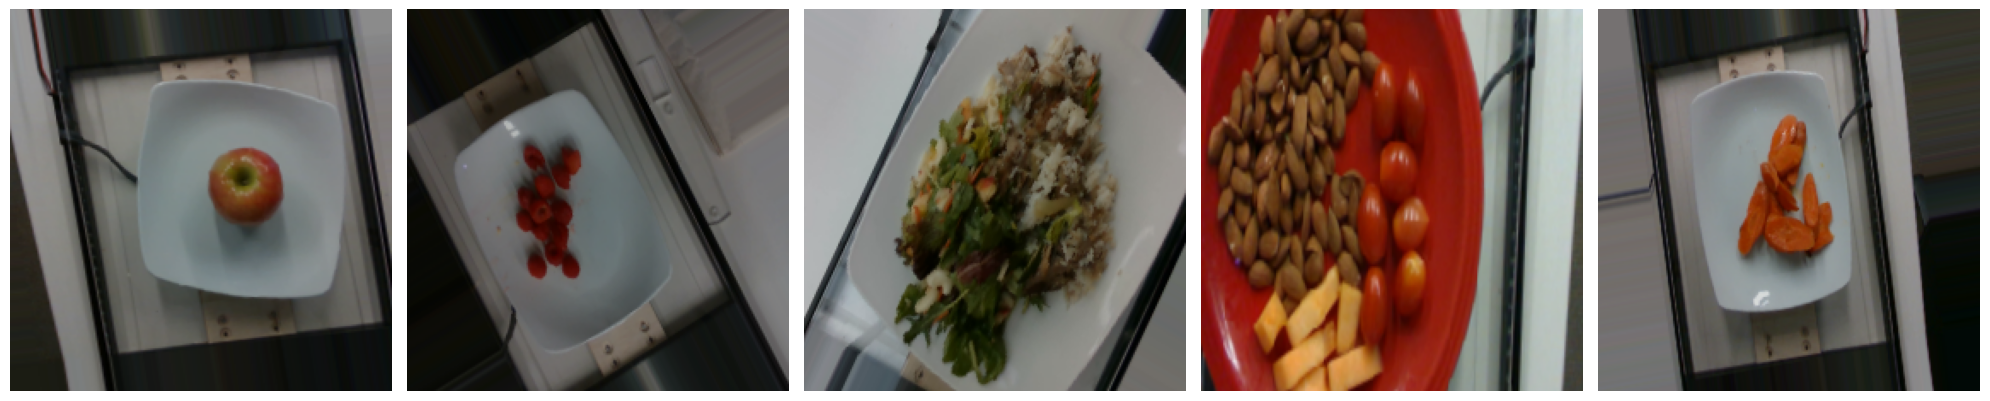

In [12]:
imgs, labels = next(train_batches)
plotImages(imgs)
# print(labels)

In [13]:
from keras.layers import Input
from keras.applications.inception_v3 import InceptionV3

inputs = Input(shape=(IMG_DIMN, IMG_DIMN, 3))
base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=inputs)

In [14]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, GlobalAveragePooling2D

x = base_model.get_layer('mixed7').output
x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = GlobalAveragePooling2D()(x)

FC1 = Dense(512, activation='relu')(x)
FC2 = Dense(512, activation='relu')(FC1)
FC3 = Dense(512, activation='relu')(FC2)

out0 = Dense(units=1, activation='linear', name='total_calories_neuron')(FC3)
out1 = Dense(units=1, activation='linear', name='total_mass_neuron')(FC3)
out2 = Dense(units=1, activation='linear', name='total_fat_neuron')(FC3)
out3 = Dense(units=1, activation='linear', name='total_carb_neuron')(FC3)
out4 = Dense(units=1, activation='linear', name='total_protein_neuron')(FC3)

# Creating the feature extraction model
model = tf.keras.Model(inputs=base_model.input, outputs=[out0, out1, out2, out3, out4])

In [16]:
for layer in model.layers[:-40]:
    layer.trainable = False

In [17]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 10,161,573 (38.76 MB)

 Trainable params: 2,919,621 (11.14 MB)

 Non-trainable params: 7,241,952 (27.63 MB)

In [18]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-5), loss='MSE')


In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# autosave best Model
checkpoint_path = './checkpoint/best_model_checkpoints.keras'
early = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [20]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=70, verbose=1, callbacks = [checkpoint, early])

Epoch 1/70
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - loss: 0.0283
Epoch 1: val_loss improved from inf to 0.00497, saving model to ./checkpoint/best_model_checkpoints.keras
174/174 ━━━━━━━━━━━━━━━━━━━━ 138s 734ms/step - loss: 0.0282 - val_loss: 0.0050
Epoch 2/70
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - loss: 0.0062
Epoch 2: val_loss improved from 0.00497 to 0.00483, saving model to ./checkpoint/best_model_checkpoints.keras
174/174 ━━━━━━━━━━━━━━━━━━━━ 117s 661ms/step - loss: 0.0062 - val_loss: 0.0048
Epoch 3/70
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - loss: 0.0062
Epoch 3: val_loss did not improve from 0.00483
174/174 ━━━━━━━━━━━━━━━━━━━━ 119s 673ms/step - loss: 0.0062 - val_loss: 0.0051
Epoch 4/70
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - loss: 0.0056
Epoch 4: val_loss improved from 0.00483 to 0.00471, saving model to ./checkpoint/best_model_checkpoints.keras
174/174 ━━━━━━━━━━━━━━━━━━━━ 116s 658ms/step - loss: 0.0056 - val_loss: 0.0047
Epoch 5/70
174/174 ━━━━━━━━━━━━━━━━

In [21]:
# The model weights (that are considered the best) are loaded into the model.
# model.load_weights(checkpoint_path)

# evaluation_results = model.evaluate(valid_batches, verbose=0)
# print('valid_loss:', evaluation_results[0], '  \t', 'calories_loss:', evaluation_results[1])
# print('mass_loss:', evaluation_results[2], ' \t', 'fats_loss:', evaluation_results[3])
# print('carbs_loss:', evaluation_results[4], '\t', 'proteins_loss:', evaluation_results[5])

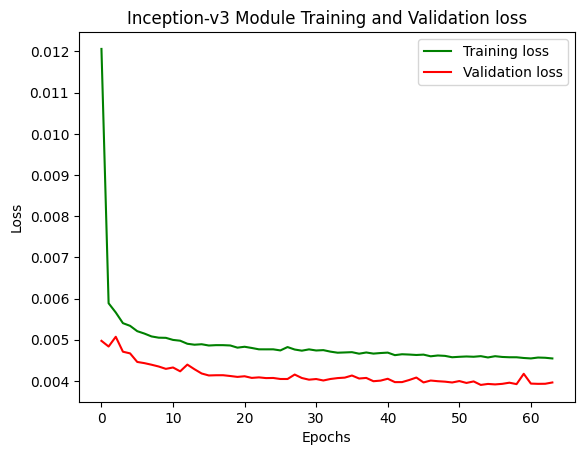

In [22]:
# summarize history for loss
plt.plot(history.history['loss'], 'g', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.title('Inception-v3 Module Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
labels = ["total_calories", "total_mass", "total_fat", "total_carb", "total_protein"]
test_datagen = ImageDataGenerator(rescale = 1/255.0)

test_batches = test_datagen.flow_from_dataframe(dataframe=df_test,
                                                directory=test_dir,
                                                x_col="dishimage",
                                                y_col=labels,
                                                target_size=(IMG_DIMN, IMG_DIMN),
                                                class_mode="raw",
                                                batch_size=BATCH_SIZE,
                                                shuffle=False)

Found 296 validated image filenames.


In [24]:
# evaluation_results = model.evaluate(test_batches, verbose=0)
# print('test_loss:', evaluation_results[0], '  \t', 'calories_loss:', evaluation_results[1])
# print('mass_loss:', evaluation_results[2], ' \t', 'fats_loss:', evaluation_results[3])
# print('carbs_loss:', evaluation_results[4], '\t', 'proteins_loss:', evaluation_results[5])

In [25]:
# get the max values to de normalize the outputs
import pandas as pd
df_outputs_max_values = pd.read_csv('./outputs_max_values.csv')
max_calorie = df_outputs_max_values.iloc[0][0]
max_mass = df_outputs_max_values.iloc[0][1]
max_fat = df_outputs_max_values.iloc[0][2]
max_carb = df_outputs_max_values.iloc[0][3]
max_protein = df_outputs_max_values.iloc[0][4]

In [26]:
def print_img_nutritions(img):
    for index, row in df_test.iterrows():
        if img == row['dishimage']:
            print('total_calories: ', row['total_calories']*max_calorie)
            print('total_mass: ', row['total_mass']*max_mass)
            print('total_fat: ', row['total_fat']*max_fat)
            print('total_carb: ', row['total_carb']*max_carb)
            print('total_protein: ', row['total_protein']*max_protein)
            break

In [27]:
import cv2

def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_DIMN, IMG_DIMN))
    img = (img / 255.0)
    return img

image:  dish_1558719097.png


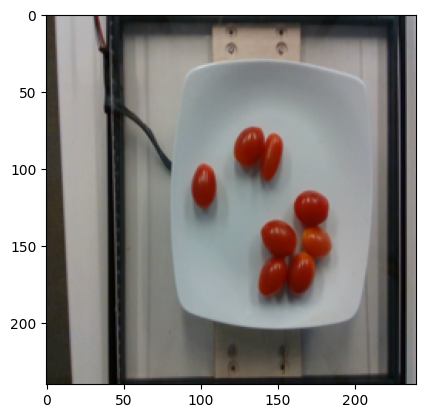

total_calories:  19.260000228881836
total_mass:  107.0
total_fat:  0.21400000154972076
total_carb:  4.172999858856201
total_protein:  0.963
**************
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
calories:  [[191.23862]]
mass:  [[239.15456]]
fat:  [[8.659611]]
carb:  [[112.42375]]
protein:  [[-24.255842]]


In [28]:
import os
import random
import numpy as np

# get random image from test data
rnd_tst_img = random.choice(os.listdir(test_dir))
rnd_tst_img_path = os.path.join(test_dir, rnd_tst_img)
print('image: ', rnd_tst_img)

# display the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(rnd_tst_img_path)
imgplot = plt.imshow(img)
plt.show()

# print the true 5 outputs from the df_test (after de-normalization)
print_img_nutritions(rnd_tst_img)

print("**************")

# preprocess the image (scale it by 1./255.)
preprocessed_img = preprocess_image(rnd_tst_img_path)

# reshape to 4d nparray
img_list = []
img_list.append(np.array(preprocessed_img))
preprocessed_reshaped_img = np.asarray(img_list)

# predict the image as numpy array
outputs = model.predict(x=preprocessed_reshaped_img)
print('calories: ', outputs[0]*max_calorie)
print('mass: ', outputs[1]*max_mass)
print('fat: ', outputs[2]*max_fat)
print('carb: ', outputs[3]*max_carb)
print('protein: ', outputs[4]*max_protein)

In [29]:
model.save("saved_model_inception.h5")

In [1]:
import tensorflow as tf

# Özel kayıp fonksiyonlarını tanımlayın
custom_objects = {
    'MSE': tf.keras.losses.MeanAbsoluteError
}

# H5 modelini yükle
model = tf.keras.models.load_model('saved_model_inception.h5', custom_objects=custom_objects)

# Modeli geçici bir dizine kaydet
temp_saved_model_dir = './temp_saved_model'
model.export(temp_saved_model_dir)  # model.save yerine model.export kullanın

# TFLite Converter ile modeli dönüştür
converter = tf.lite.TFLiteConverter.from_saved_model(temp_saved_model_dir)
tflite_model = converter.convert()

# Dönüştürülmüş modeli kaydet
with open('mobile_net.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: ./temp_saved_model\assets


INFO:tensorflow:Assets written to: ./temp_saved_model\assets


Saved artifact at './temp_saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  List[TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)]
Captures:
  2202654118288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2202654119824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2202654118864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2202654119632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2202654120208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2202654120592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2202654121168: TensorSpec(shape=(), dtype=tf.resource, name=None)
 